In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [6]:
file_aug = '/home/om18/Documents/KCL/Nov 5 2019 - Nodule Detection/LUNA16_nodule_detection/FP_reduction_3_5fold_xval/cycleGAN_augmented/aug_path.txt'
file_data = '/home/om18/Documents/KCL/Nov 5 2019 - Nodule Detection/LUNA16_nodule_detection/FP_reduction_3_5fold_xval/cycleGAN_augmented/data_path.txt'

In [9]:
cand_path = np.loadtxt('data_path.txt','str').item()
cand_path

'/media/om18/45c77682-c907-4971-84d4-126ad0d801dc1/LUNA16/candidates/'

In [10]:
fold_k=0
train_subset_folders = [f'subset{i}/' for i in [x for x in range(10) if (x!=fold_k) and (x!=fold_k+1)]]

In [11]:
train_subset_folders

['subset2/',
 'subset3/',
 'subset4/',
 'subset5/',
 'subset6/',
 'subset7/',
 'subset8/',
 'subset9/']

In [12]:
train_subset_folders = [cand_path + train_subset_folders[i] for i in range(len(train_subset_folders))]
train_subset_folders

['/media/om18/45c77682-c907-4971-84d4-126ad0d801dc1/LUNA16/candidates/subset2/',
 '/media/om18/45c77682-c907-4971-84d4-126ad0d801dc1/LUNA16/candidates/subset3/',
 '/media/om18/45c77682-c907-4971-84d4-126ad0d801dc1/LUNA16/candidates/subset4/',
 '/media/om18/45c77682-c907-4971-84d4-126ad0d801dc1/LUNA16/candidates/subset5/',
 '/media/om18/45c77682-c907-4971-84d4-126ad0d801dc1/LUNA16/candidates/subset6/',
 '/media/om18/45c77682-c907-4971-84d4-126ad0d801dc1/LUNA16/candidates/subset7/',
 '/media/om18/45c77682-c907-4971-84d4-126ad0d801dc1/LUNA16/candidates/subset8/',
 '/media/om18/45c77682-c907-4971-84d4-126ad0d801dc1/LUNA16/candidates/subset9/']

In [13]:
aug_cand_path = np.loadtxt(file_aug,'str').item()
aug_cand_path

'/media/om18/45c77682-c907-4971-84d4-126ad0d801dc1/LUNA16/cycleGAN_aug_10_folds/'

In [62]:
train_aug_subset_folders = [aug_cand_path + train_subset_folders[ii][-8::] for ii in range(len(train_subset_folders))]
train_aug_subset_folders

['/media/om18/45c77682-c907-4971-84d4-126ad0d801dc1/LUNA16/cycleGAN_aug_10_folds/subset2/',
 '/media/om18/45c77682-c907-4971-84d4-126ad0d801dc1/LUNA16/cycleGAN_aug_10_folds/subset3/',
 '/media/om18/45c77682-c907-4971-84d4-126ad0d801dc1/LUNA16/cycleGAN_aug_10_folds/subset4/',
 '/media/om18/45c77682-c907-4971-84d4-126ad0d801dc1/LUNA16/cycleGAN_aug_10_folds/subset5/',
 '/media/om18/45c77682-c907-4971-84d4-126ad0d801dc1/LUNA16/cycleGAN_aug_10_folds/subset6/',
 '/media/om18/45c77682-c907-4971-84d4-126ad0d801dc1/LUNA16/cycleGAN_aug_10_folds/subset7/',
 '/media/om18/45c77682-c907-4971-84d4-126ad0d801dc1/LUNA16/cycleGAN_aug_10_folds/subset8/',
 '/media/om18/45c77682-c907-4971-84d4-126ad0d801dc1/LUNA16/cycleGAN_aug_10_folds/subset9/']

In [63]:
fldr = train_aug_subset_folders[0]
tmp_df = pd.DataFrame(columns=['seriesuid','coordX','coordY','coordZ','class','diameter_mm','filename'])
tmp_df['filename'] = [fldr + file for file in os.listdir(fldr)]
print(tmp_df.shape)
tmp_df

(16603, 7)


,seriesuid,coordX,coordY,coordZ,class,diameter_mm,filename
0,NaN,NaN,NaN,NaN,NaN,NaN,/media/om18/45c77682-c907-4971-84d4-126ad0d801...
1,NaN,NaN,NaN,NaN,NaN,NaN,/media/om18/45c77682-c907-4971-84d4-126ad0d801...
2,NaN,NaN,NaN,NaN,NaN,NaN,/media/om18/45c77682-c907-4971-84d4-126ad0d801...
3,NaN,NaN,NaN,NaN,NaN,NaN,/media/om18/45c77682-c907-4971-84d4-126ad0d801...
4,NaN,NaN,NaN,NaN,NaN,NaN,/media/om18/45c77682-c907-4971-84d4-126ad0d801...
...,...,...,...,...,...,...,...
16598,NaN,NaN,NaN,NaN,NaN,NaN,/media/om18/45c77682-c907-4971-84d4-126ad0d801...
16599,NaN,NaN,NaN,NaN,NaN,NaN,/media/om18/45c77682-c907-4971-84d4-126ad0d801...
16600,NaN,NaN,NaN,NaN,NaN,NaN,/media/om18/45c77682-c907-4971-84d4-126ad0d801...
16601,NaN,NaN,NaN,NaN,NaN,NaN,/media/om18/45c77682-c907-4971-84d4-126ad0d801...


In [64]:
tmp_df['epoch']= tmp_df['filename'].apply(lambda x:int(x.split('_ep')[-1]))

In [65]:
print(tmp_df.shape)
tmp_df = tmp_df[tmp_df['epoch']<70]
tmp_df = tmp_df.drop('epoch',axis=1)
print(tmp_df.shape)

(16603, 8)
(4671, 7)


In [61]:
16603 / 4671

3.5544851209591095

In [70]:
fldr

'/media/om18/45c77682-c907-4971-84d4-126ad0d801dc1/LUNA16/cycleGAN_aug_10_folds/subset9/'

In [69]:
eps_all = []
for fldr in train_aug_subset_folders:
    for file in os.listdir(fldr):
        ep = int(file.split('_ep')[-1])
        eps_all.append(ep)

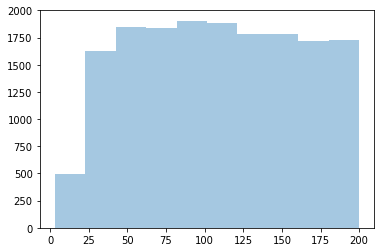

In [75]:
import seaborn as sns
sns.distplot(eps, bins=10, kde=False);

In [80]:
eps_all_less_70 = [i for i in eps_all if i<70]
len(eps_all), len(eps_all_less_70), len(eps_all_less_70)/len(eps_all)

(121865, 33148, 0.2720059081770812)

In [46]:
tmp_df = pd.DataFrame(columns=['seriesuid','coordX','coordY','coordZ','class','diameter_mm','filename'])
tmp_df.append({'seriesuid':'x','coordX':'x','coordY':'x','coordZ':'x','class':'x','diameter_mm':'x',
               'filename': fldr + file}, ignore_index=True)
tmp_df

,seriesuid,coordX,coordY,coordZ,class,diameter_mm,filename


In [39]:
tmp_df_all

,seriesuid,coordX,coordY,coordZ,class,diameter_mm,filename


In [41]:
fldr + file

'/media/om18/45c77682-c907-4971-84d4-126ad0d801dc1/LUNA16/cycleGAN_aug_10_folds/subset2/1.3.6.1.4.1.14519.5.2.1.6279.6001.187966156856911682643615997798_block1_210_z86y260x99_ep102'